In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.cluster as kMeans
import numpy as np
import statsmodels.api as smf
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#metricas de avaliação
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/content/dengue_35-20 aquiraz.csv", sep=",")
df2 = pd.read_csv("/content/dengue_35-20 caucaia.csv", sep=",")
df3 = pd.read_csv("/content/dengue_35-20 fortaleza.csv", sep=",")
df4 = pd.read_csv("/content/dengue_35-20 maracanau.csv", sep=",")
df5 = pd.read_csv("/content/dengue_35-20 paracuru.csv", sep=",")
df

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
0,2024-05-05,202419,8.0,1,28,0,0.494677,8.669173,0,1,...,80.711254,80.237182,28.488889,28.555556,NaN,NaN,NaN,NaN,NaN,64
1,2024-04-28,202418,5.0,0,18,0,0.067334,5.418233,0,1,...,87.276541,86.167180,27.304545,27.454545,NaN,NaN,NaN,NaN,NaN,64
2,2024-04-21,202417,4.0,2,10,2,0.059787,4.334587,0,1,...,85.237595,84.198522,27.113636,27.181818,NaN,NaN,NaN,NaN,NaN,64
3,2024-04-14,202416,18.0,17,21,17,0.992754,19.505640,0,1,...,86.518861,84.641308,27.684211,27.894737,NaN,NaN,NaN,NaN,NaN,64
4,2024-04-07,202415,8.0,8,10,8,0.876661,8.669173,0,1,...,87.234853,85.411612,27.736842,28.000000,NaN,NaN,NaN,NaN,NaN,64
5,2024-03-31,202414,6.0,6,8,6,0.853280,6.501880,0,1,...,84.341718,83.691123,28.125000,28.200000,NaN,NaN,NaN,NaN,NaN,64
6,2024-03-24,202413,4.0,4,4,4,0.627983,4.334587,0,1,...,88.569791,86.154237,27.361111,27.611111,NaN,NaN,NaN,NaN,NaN,64
7,2024-03-17,202412,2.0,2,2,2,0.134192,2.167293,0,1,...,84.939883,83.427196,28.175000,28.250000,NaN,NaN,NaN,NaN,NaN,64
8,2024-03-10,202411,3.0,3,3,3,0.161020,3.250940,0,1,...,86.565718,84.363271,27.900000,28.000000,NaN,NaN,NaN,NaN,NaN,64
9,2024-03-03,202410,3.0,3,3,3,0.279323,3.250940,0,1,...,81.933883,81.365461,28.156863,28.176471,NaN,NaN,NaN,NaN,NaN,64


In [3]:
df6 = pd.concat([df, df2, df3, df4, df5])
df6

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
0,2024-05-05,202419,8.0,1,28,0,0.494677,8.669173,0,1,...,80.711254,80.237182,28.488889,28.555556,NaN,NaN,NaN,NaN,NaN,64
1,2024-04-28,202418,5.0,0,18,0,0.067334,5.418233,0,1,...,87.276541,86.167180,27.304545,27.454545,NaN,NaN,NaN,NaN,NaN,64
2,2024-04-21,202417,4.0,2,10,2,0.059787,4.334587,0,1,...,85.237595,84.198522,27.113636,27.181818,NaN,NaN,NaN,NaN,NaN,64
3,2024-04-14,202416,18.0,17,21,17,0.992754,19.505640,0,1,...,86.518861,84.641308,27.684211,27.894737,NaN,NaN,NaN,NaN,NaN,64
4,2024-04-07,202415,8.0,8,10,8,0.876661,8.669173,0,1,...,87.234853,85.411612,27.736842,28.000000,NaN,NaN,NaN,NaN,NaN,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2023-09-24,202339,0.0,0,0,0,0.000000,0.000000,0,1,...,78.747137,72.475238,26.916667,27.944444,NaN,NaN,NaN,NaN,NaN,13
33,2023-09-17,202338,0.0,0,0,0,0.000000,0.000000,0,1,...,79.001807,76.002810,27.142045,27.681818,NaN,NaN,NaN,NaN,NaN,13
34,2023-09-10,202337,1.0,1,1,1,0.730421,2.497128,0,1,...,76.459191,66.929103,27.333333,29.000000,NaN,NaN,NaN,NaN,NaN,13
35,2023-09-03,202336,0.0,0,0,0,0.000000,0.000000,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13


In [4]:
df6["data_iniSE"] = pd.to_datetime(df["data_iniSE"])
mes = df6["data_iniSE"].dt.month
dia = df6["data_iniSE"].dt.day
ano = df6["data_iniSE"].dt.year
casos = df6["casos"]
tempmed = df6["tempmed"]
umidmed = df6["umidmed"]

In [5]:
df6 = pd.DataFrame({'Dia': dia,'Mês':mes, 'Ano': ano, 'Casos': casos, 'TemperaturaM':tempmed, 'UmidadeM':umidmed})

In [6]:
df6

,Dia,Mês,Ano,Casos,TemperaturaM,UmidadeM
0,5,5,2024,0,28.488889,80.711254
1,28,4,2024,0,27.304545,87.276541
2,21,4,2024,2,27.113636,85.237595
3,14,4,2024,17,27.684211,86.518861
4,7,4,2024,8,27.736842,87.234853
...,...,...,...,...,...,...
32,24,9,2023,0,26.916667,78.747137
33,17,9,2023,0,27.142045,79.001807
34,10,9,2023,1,27.333333,76.459191
35,3,9,2023,0,NaN,NaN


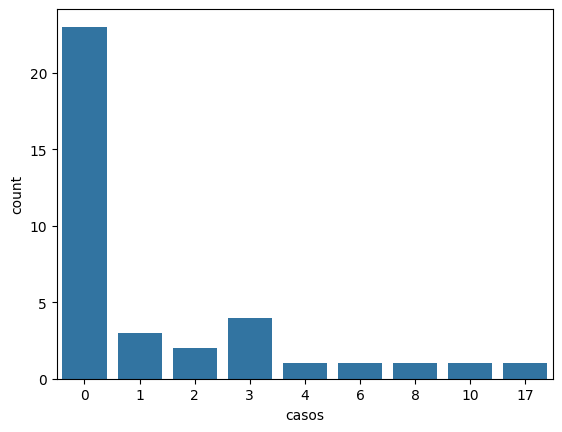

In [7]:
sns.countplot(x="casos", data=df);

In [8]:
columns_to_remove = ["SE","id","casos_est",
                     "casos_est_min","casos_est_max",
                     "p_rt1","p_inc100k",
                     "Localidade_id","nivel",
                     "casprov","casprov_est","casprov_est_min",
                     "casprov_est_max","casconf","tweet","Rt","pop","receptivo",
                     "transmissao","nivel_inc","notif_accum_year","versao_modelo" ]
df = df.drop(columns_to_remove, axis=1)
df.sample(4)

,data_iniSE,casos,tempmin,umidmax,umidmed,umidmin,tempmed,tempmax
11,2024-02-18,3,27.545455,86.107672,85.085193,84.062718,27.681818,27.818182
29,2023-10-15,0,26.863636,78.181983,76.632077,74.158368,27.119318,27.545455
36,2023-08-27,0,NaN,81.255427,NaN,NaN,NaN,NaN
21,2023-12-10,0,27.064516,83.964228,76.038369,67.626502,27.919355,29.516129


In [9]:
df6.isnull().sum()

Dia              0
Mês              0
Ano              0
Casos            0
TemperaturaM    20
UmidadeM        20
dtype: int64

In [10]:
df6_treino = df6.dropna(subset=["TemperaturaM","UmidadeM"])

In [11]:
X = df6_treino.drop('Casos',axis=1)
y= df6_treino['Casos']

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.3,random_state= 42)

In [13]:
sca = preprocessing.StandardScaler()

In [14]:
cols = X.columns
cols

Index(['Dia', 'Mês', 'Ano', 'TemperaturaM', 'UmidadeM'], dtype='object')

In [15]:
df["data_iniSE"].dtype
#float_cols = X_train

dtype('O')

In [16]:
float_cols = X_train

In [17]:
df6.dtypes

Dia               int32
Mês               int32
Ano               int32
Casos             int64
TemperaturaM    float64
UmidadeM        float64
dtype: object

In [18]:
df6.dtypes

Dia               int32
Mês               int32
Ano               int32
Casos             int64
TemperaturaM    float64
UmidadeM        float64
dtype: object

In [19]:
df.data_iniSE = df['data_iniSE']

In [20]:
df6.dtypes

Dia               int32
Mês               int32
Ano               int32
Casos             int64
TemperaturaM    float64
UmidadeM        float64
dtype: object

In [21]:
X_train
df6.drop([12,16,23,24,35,36])

,Dia,Mês,Ano,Casos,TemperaturaM,UmidadeM
0,5,5,2024,0,28.488889,80.711254
1,28,4,2024,0,27.304545,87.276541
2,21,4,2024,2,27.113636,85.237595
3,14,4,2024,17,27.684211,86.518861
4,7,4,2024,8,27.736842,87.234853
...,...,...,...,...,...,...
30,8,10,2023,0,27.193750,78.153370
31,1,10,2023,0,27.125000,76.299059
32,24,9,2023,0,26.916667,78.747137
33,17,9,2023,0,27.142045,79.001807


In [22]:
y_train
df6.drop([23,24,35,36])

,Dia,Mês,Ano,Casos,TemperaturaM,UmidadeM
0,5,5,2024,0,28.488889,80.711254
1,28,4,2024,0,27.304545,87.276541
2,21,4,2024,2,27.113636,85.237595
3,14,4,2024,17,27.684211,86.518861
4,7,4,2024,8,27.736842,87.234853
...,...,...,...,...,...,...
30,8,10,2023,0,27.193750,78.153370
31,1,10,2023,0,27.125000,76.299059
32,24,9,2023,0,26.916667,78.747137
33,17,9,2023,0,27.142045,79.001807


In [23]:
df6
df6.drop([12,16,23,24,35,36])

,Dia,Mês,Ano,Casos,TemperaturaM,UmidadeM
0,5,5,2024,0,28.488889,80.711254
1,28,4,2024,0,27.304545,87.276541
2,21,4,2024,2,27.113636,85.237595
3,14,4,2024,17,27.684211,86.518861
4,7,4,2024,8,27.736842,87.234853
...,...,...,...,...,...,...
30,8,10,2023,0,27.193750,78.153370
31,1,10,2023,0,27.125000,76.299059
32,24,9,2023,0,26.916667,78.747137
33,17,9,2023,0,27.142045,79.001807


In [24]:
X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=cols)
X_test = sca.transform(X_test)
X_test = pd.DataFrame(X_test,columns=cols)

In [25]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [26]:
X_train

,Dia,Mês,Ano,TemperaturaM,UmidadeM
0,0.073317,0.741649,-1.160577,-1.118354,-0.412368
1,0.188816,-0.959284,0.861640,-0.177994,0.978795
2,-0.735177,0.741649,-1.160577,-0.785104,-0.993819
3,0.073317,1.470621,-1.160577,0.338451,-0.398334
4,0.881811,-0.716294,0.861640,-0.736711,1.775661
...,...,...,...,...,...
110,1.690304,-0.716294,0.861640,0.594091,0.808775
111,0.073317,-0.716294,0.861640,0.681198,0.945565
112,1.343807,-1.202275,0.861640,1.994025,-1.207146
113,0.650812,0.984640,-1.160577,-1.338164,-0.658575


In [27]:
y_pred = knn_model.predict(X_test)
y_pred

array([ 87.57142857,  24.        ,   2.71428571,  44.14285714,
         5.57142857,   5.57142857,  41.71428571,   0.71428571,
       110.        ,  39.        ,   0.42857143,   0.42857143,
        36.14285714,  42.42857143,  30.14285714,  41.71428571,
        42.42857143,  67.        ,  30.14285714,  24.        ,
        26.42857143,   0.71428571,  90.85714286,  26.42857143,
        44.        ,  30.14285714,   2.71428571,  14.        ,
       110.        ,   5.57142857,  86.        ,  90.85714286,
        27.14285714,   0.71428571, 110.        ,  15.71428571,
        90.85714286,  26.42857143,  87.57142857,  44.14285714,
        41.71428571,  26.42857143,   0.71428571,  27.14285714,
        67.        ,  87.57142857,  24.        ,  44.14285714,
        27.14285714,  67.        ])

In [28]:
y_train

33    169
11      3
34      4
20     27
6       4
     ... 
5     563
7      29
14      1
28    118
3      36
Name: Casos, Length: 115, dtype: int64

In [29]:
#Dados nulos
df6.isnull().sum()

Dia              0
Mês              0
Ano              0
Casos            0
TemperaturaM    20
UmidadeM        20
dtype: int64

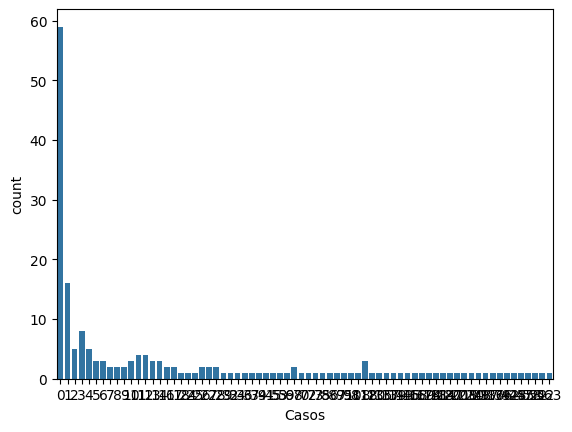

In [30]:
sns.countplot(x="Casos", data=df6);

In [31]:
fig = px.scatter(df6, x="Casos",
                 y="Mês",
                 title= "Numeros de Casos")
fig.show()

In [32]:
fig = px.scatter(x=y_test, y=y_pred, title="Casos por Mês", trendline="ols", labels= {"X":"Casos","y":"Mês"})
fig.show()

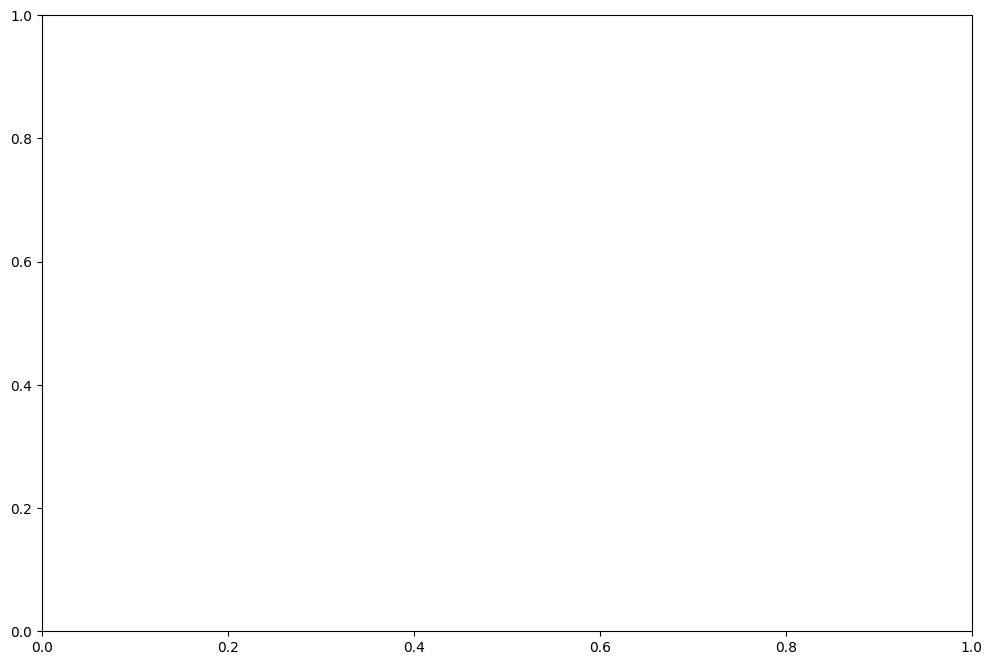

In [39]:
barWidth = 0.15
fig = plt.subplots(figsize =(12,8))

In [42]:
Fortaleza = [371, 748, 1350, 2430, 1124]
Aquiraz = [0, 1, 16, 18, 27]
Paracuru = [1, 1, 6, 0, 2]
Maracanau = [17, 27, 260, 142, 114]
Caucaia = [8, 46, 157, 267, 37]

In [44]:
br1 = np.arange(len(Fortaleza))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

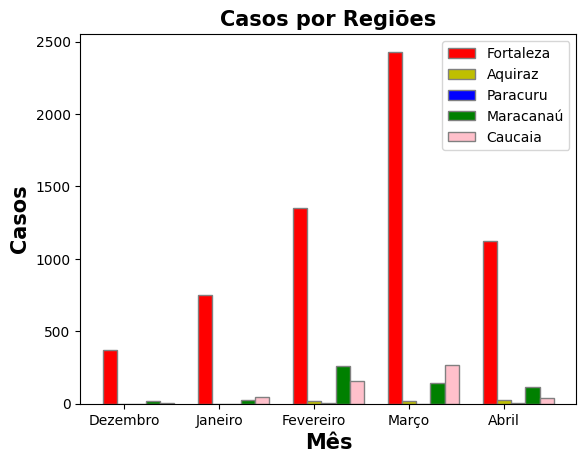

In [47]:
plt.bar(br1, Fortaleza, color ='r', width = barWidth, edgecolor = 'grey', label = 'Fortaleza')
plt.bar(br2, Aquiraz, color ='y', width = barWidth, edgecolor = 'grey', label = 'Aquiraz')
plt.bar(br3, Paracuru, color ='b', width = barWidth, edgecolor = 'grey', label = 'Paracuru')
plt.bar(br4, Maracanau, color ='g', width = barWidth, edgecolor = 'grey', label = 'Maracanaú')
plt.bar(br5, Caucaia, color ='pink', width = barWidth, edgecolor = 'grey', label = 'Caucaia')
plt.title('Casos por Regiões', fontweight ='bold', fontsize = 15)
plt.xlabel('Mês', fontweight ='bold', fontsize = 15)
plt.ylabel('Casos', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Fortaleza))],
  ['Dezembro', 'Janeiro', 'Fevereiro', 'Março', 'Abril'])
plt.legend()